In [1]:
pip install kaggle

  Using cached kaggle-1.6.17.tar.gz (82 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105796 sha256=259db338964c571dd3b509e4e284664fd51e3ba6ebd9cc7dc33ccf8ef8ed849a
  Stored in directory: c:\users\ayush\appdata\local\pip\cache\wheels\ff\55\fb\b27a466be754d2a06ffe0e37b248d844f090a63b51becea85d
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [5]:
import librosa
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
def extract_features(audio_file):
    y, sr = librosa.load(audio_file, sr=None)  
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13) 
    mfcc = np.mean(mfcc.T, axis=0) 
    return mfcc


audio_directory = "toronto/tess"

features = []
labels = []
for emotion in os.listdir(audio_directory):
    emotion_folder = os.path.join(audio_directory, emotion)
    if os.path.isdir(emotion_folder):
        for filename in os.listdir(emotion_folder):
            file_path = os.path.join(emotion_folder, filename)
            if filename.endswith(".wav"): 
                feature = extract_features(file_path)
                features.append(feature)
                labels.append(emotion)


X = np.array(features)
y = np.array(labels)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"Extracted {len(X)} samples.")

Extracted 2799 samples.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("SVM Model Evaluation:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


SVM Model Evaluation:
                       precision    recall  f1-score   support

             OAF_Fear       0.55      0.53      0.54        77
OAF_Pleasant_surprise       0.77      0.65      0.71        81
              OAF_Sad       0.93      0.94      0.93        79
            OAF_angry       0.55      0.69      0.61        75
          OAF_disgust       0.92      0.91      0.92        89
            OAF_happy       0.86      0.81      0.84        75
          OAF_neutral       0.89      0.87      0.88        84

             accuracy                           0.78       560
            macro avg       0.78      0.77      0.77       560
         weighted avg       0.78      0.78      0.78       560



In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))

y_cat = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_cat, test_size=0.2, random_state=42)

model = Sequential()

model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(LSTM(64, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(32, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

model.save('improved_model.h5')

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Improved LSTM Model Accuracy: {accuracy:.2f}")


C:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.2092 - loss: 2.0299 - val_accuracy: 0.1911 - val_loss: 1.9337
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2848 - loss: 1.8067 - val_accuracy: 0.2393 - val_loss: 1.8823
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3564 - loss: 1.7021 - val_accuracy: 0.3625 - val_loss: 1.7937
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3729 - loss: 1.6307 - val_accuracy: 0.4804 - val_loss: 1.5926
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3931 - loss: 1.5741 - val_accuracy: 0.5089 - val_loss: 1.4793
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4231 - loss: 1.4966 - val_accuracy: 0.5393 - val_loss: 1.2686
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4479 - loss: 1.4578 - val_accuracy: 0.6179 - val_loss: 1.2966
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4746 - loss: 1.3931 - val_accuracy: 0.7018 -

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8466 - loss: 0.3388 
Improved LSTM Model Accuracy: 0.86


In [41]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/129.1 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


In [42]:
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam

# Define the HyperModel class
class EmotionRecognitionModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32),
                       input_shape=(X_train.shape[1], X_train.shape[2]),
                       return_sequences=False))
        model.add(Dropout(0.5))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(len(label_encoder.classes_), activation='softmax'))

        model.compile(
            optimizer=Adam(learning_rate=hp.Float('lr', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

# Initialize and search for the best hyperparameters
tuner = RandomSearch(
    EmotionRecognitionModel(),
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='tuner_results',
    project_name='emotion_recognition'
)

# Run hyperparameter search
tuner.search(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Get the best model and evaluate it
best_model = tuner.get_best_models(1)[0]
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Best model accuracy: {accuracy:.2f}")


Trial 5 Complete [00h 00m 18s]
val_accuracy: 0.6458333333333334

Best val_accuracy So Far: 0.9458333253860474
Total elapsed time: 00h 01m 30s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9438 - loss: 0.2123  
Best model accuracy: 0.95


In [54]:
# Save the best model (assuming it's a Keras model)
best_model.save('best_model.h5')

# To load the saved model later
from tensorflow.keras.models import load_model
loaded_model = load_model('best_model.h5')


In [45]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Example of data loading and preprocessing
# Assuming X and y are your features and target variables
# X = your_feature_data
# y = your_labels

# Example: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Label encoding if necessary (for multi-class problems)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Define parameter grid for tuning
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient for 'rbf', 'poly'
}

# Set up the SVM model
svm_model = SVC()

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model using the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Best SVM model after tuning
best_svm_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_svm_model.predict(X_test)
print("SVM Model Evaluation:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Optionally, get cross-validation results
print("Best cross-validation score: ", grid_search.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
SVM Model Evaluation:
              precision    recall  f1-score   support

       Angry       1.00      1.00      1.00        18
       Happy       0.76      0.89      0.82        18
     Neutral       0.88      0.81      0.84        26
         Sad       1.00      0.94      0.97        18

    accuracy                           0.90        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.90      0.90        80

Best cross-validation score:  0.928125


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = best_svm_model.predict(X_test)

# Evaluate the model performance
print("Accuracy on test data: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy on test data:  0.9
Confusion Matrix:
 [[18  0  0  0]
 [ 0 16  2  0]
 [ 0  5 21  0]
 [ 0  0  1 17]]
Classification Report:
               precision    recall  f1-score   support

       Angry       1.00      1.00      1.00        18
       Happy       0.76      0.89      0.82        18
     Neutral       0.88      0.81      0.84        26
         Sad       1.00      0.94      0.97        18

    accuracy                           0.90        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.90      0.90        80



In [47]:
best_svm_model = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced')
best_svm_model.fit(X_train, y_train)


SVC(C=1, class_weight='balanced')

In [49]:
from sklearn.svm import SVC

# Initialize the SVM model with probability estimation enabled
best_svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True)

# Train the model
best_svm_model.fit(X_train, y_train)

# Now, you can use predict_proba
y_pred_prob = best_svm_model.predict_proba(X_test)


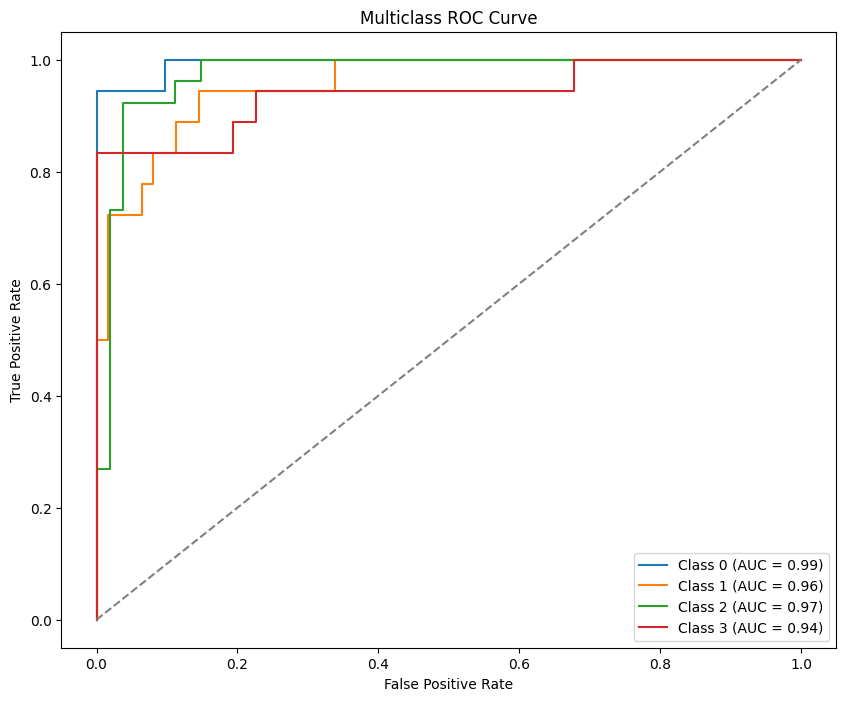

Class 0 AUC: 0.99
Class 1 AUC: 0.96
Class 2 AUC: 0.97
Class 3 AUC: 0.94


In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the labels for multiclass classification
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # Adjust the number of classes based on your dataset

# Get the predicted probabilities
y_pred_prob = best_svm_model.predict_proba(X_test)

# Initialize the figure for plotting
plt.figure(figsize=(10, 8))

# Iterate over each class and calculate the ROC curve and AUC
fpr, tpr, roc_auc = {}, {}, {}
for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC for each class
for i in range(y_test_bin.shape[1]):
    print(f"Class {i} AUC: {roc_auc[i]:.2f}")


In [52]:
import joblib

# Save the model to a file
joblib.dump(best_svm_model, 'svm_emotion_model.pkl')

# To load the model back later:
loaded_model = joblib.load('svm_emotion_model.pkl')


In [53]:
import joblib

# Load the saved SVM model
loaded_model = joblib.load('svm_emotion_model.pkl')

# Check if the model has the 'classes_' attribute
if hasattr(loaded_model, 'classes_'):
    print("Class labels:", loaded_model.classes_)
else:
    print("No 'classes_' attribute found. You will need to define the class labels manually.")


Class labels: [0 1 2 3]
